In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Splitting the data

In [6]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df,test_size=0.2)

In [7]:
print(train.shape)

(171, 10)


In [8]:
print(test.shape)

(43, 10)


In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [23]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))    

[[0.8187134502923976, 0.7906976744186046], [0.7485380116959064, 0.7209302325581395], [0.7192982456140351, 0.7441860465116279], [0.6783625730994152, 0.6976744186046512], [0.6257309941520468, 0.7441860465116279], [0.6257309941520468, 0.6744186046511628], [0.6198830409356725, 0.7441860465116279], [0.6257309941520468, 0.7209302325581395], [0.6257309941520468, 0.7441860465116279], [0.6198830409356725, 0.6511627906976745], [0.6081871345029239, 0.6976744186046512], [0.6081871345029239, 0.7209302325581395], [0.5789473684210527, 0.7209302325581395], [0.5847953216374269, 0.6744186046511628], [0.5730994152046783, 0.6744186046511628], [0.5789473684210527, 0.6744186046511628], [0.5847953216374269, 0.6744186046511628], [0.5847953216374269, 0.6744186046511628], [0.5789473684210527, 0.6744186046511628], [0.5789473684210527, 0.6511627906976745], [0.5730994152046783, 0.6511627906976745], [0.5730994152046783, 0.6511627906976745], [0.5730994152046783, 0.6511627906976745], [0.5614035087719298, 0.6279069767

In [13]:
#Visualization

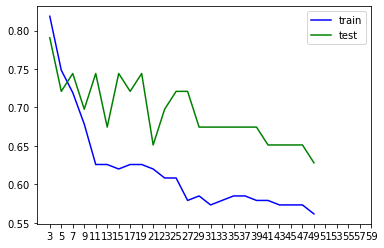

In [24]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"b")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"g")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()

In [25]:
#Model for k=3

In [26]:
neighbour=KNC(n_neighbors=3)

In [27]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8187134502923976 0.7906976744186046


In [28]:
#Model for k=5

In [30]:
neighbour=KNC(n_neighbors=5)

In [31]:
neighbour.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc= np.mean(neighbour.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc= np.mean(neighbour.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.7485380116959064 0.7209302325581395


In [32]:
# We can take k = 3 as it gives more accuracy

In [34]:
x_train=train.iloc[:,0:9]
y_train=train.iloc[:,9]

In [35]:
x_test=test.iloc[:,0:9]
y_test=test.iloc[:,9]

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_pred = neighbour.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[13,  2,  1,  0,  0,  0],
       [ 3, 13,  0,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3]], dtype=int64)

In [39]:
# classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74        16
           2       0.76      0.81      0.79        16
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0
           7       1.00      0.75      0.86         4

    accuracy                           0.72        43
   macro avg       0.57      0.56      0.56        43
weighted avg       0.68      0.72      0.70        43



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
